# Vortex sheets
Our numerical method for 2D-potential flow will be developed using vortex sheets. In this first lesson, we derive the equations for a simple vortex sheet and plot the velocity fields.

## Potential Function
Consider a 2D vortex sheet defined along a curve $\cal S$. The sheet is characterized by a *strength* $\gamma(s)$, where $s$ is the coordinate along the sheet. An infinitesimal segment of this sheet is an infinitesimal point-vortex with strength $d\Gamma = \gamma ds$. Therefore we can integrate the potential for a point vortex

$$ \phi = \frac{\Gamma}{2\pi}\theta $$

to define the potential function for a vortex sheet as

$$ \phi(x,y) = \int_{\cal S} \frac{\gamma(s)}{2\pi}\theta(x,y,s)\ ds $$

where $\theta$ is the angle from $s$ to the point at which we evaluate the potential. 

---
![image](resources/graphics1.png)

---

For a vortex sheet defined from $-S,S$ along the $x$-axis, $\theta=\tan^{-1}(y/(x-s))$. If the strength is constant along the sheet, the potential is

$$ \phi(x,y) = \frac{\gamma}{2\pi}\int^S_{-S} \tan^{-1}\left(\frac y{x-s}\right)ds $$

## Velocity Field

The velocity is defined from the potential as

$$ u = \frac{\partial\phi}{\partial x}, \quad v = \frac{\partial\phi}{\partial y} $$

Therefore, the $u$ velocity is

$$u(x,y) = \frac{\gamma}{2\pi}\int^S_{-S} \frac{-y}{y^2+(x-s)^2} ds $$

substitute $t = (x-s)/y$, $dt = -ds/y$ and integrate to get

$$u(x,y) = \frac{\gamma}{2\pi}\left[\tan^{-1}\left(\frac{x-S}y\right)-\tan^{-1}\left(\frac{x+S}y\right)\right].$$

While the $v$ velocity is

$$v(x,y) = \frac{\gamma}{2\pi}\int^S_{-S} \frac{x-s}{y^2+(x-s)^2} ds $$

substitute $t = (x-s)^2+y^2$, $dt = -2(x-s)ds$ and integrate to get

$$v(x,y) =\frac{\gamma}{4\pi} \log\left(\frac{(x+S)^2+y^2}{(x-S)^2+y^2}\right).$$

That's it! For a given $\gamma$ and $S$ we can determine the velocity at any point $x,y$ by evaluating some $\tan^{-1}$ and $\log$ functions.

## Numerical implementation

To visualize the velocity field we will discretize the background space into a uniform grid and evaluate the functions above at each point. 

We need to `import numpy` to do this. This imports numerical functions like `linspace` to evenly divide up a line segment into an array points, and `meshgrid` which takes two one-dimensional arrays and creates two two-dimensional arrays to fill the space. 

In [1]:
import numpy

N = 30                          # number of points along each axis
X = numpy.linspace(-2, 2.000000, N)    # computes a 1D-array for x
Y = numpy.linspace(-2, 2, N)    # computes a 1D-array for y
x, y = numpy.meshgrid(X, Y)     # generates a mesh grid

Lets visualize the grid to see what we made. We need to `import pyplot` which has a large set of plotting functions similar to matlab, such as a scatter plot.

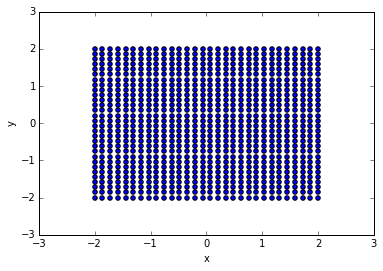

In [2]:
from matplotlib import pyplot
%matplotlib inline
pyplot.scatter(x, y)
pyplot.xlabel('x')
pyplot.ylabel('y')

As expected, a grid of equally space points.

Next, we use the equations above to determine the velocity at each point in terms of the source strength and sheet extents. Since we'll use this repeatedly, we will write it as a set of functions.


##### Coding fundamental: Functions
##### Don't ever write the same code twice!

If you aren't familiar with defining functions in python, [read up](http://en.wikibooks.org/wiki/A_Beginner%27s_Python_Tutorial/Functions). 

In [3]:
# velocity component functions
def get_u( x, y, S, gamma ):
    return gamma/(2*numpy.pi)*(numpy.arctan((x-S)/y)-numpy.arctan((x+S)/y))
def get_v( x, y, S, gamma ):
    return gamma/(4*numpy.pi)*(numpy.log(((x+S)**2+y**2)/((x-S)**2+y**2)))

Not the prettiest equations, but nothing `numpy` can't handle. 

Now let's make a function to plot the flow. We'll use arrows to show the velocity vectors (`quiver`) and color contours to show the velocity magnitude (`contourf` with `colorbar` for the legend). 

I've also included the `streamplot` function to plot streamlines, but this is slow, so I'll let you turn it on your self if you want them.

In [4]:
def plot_uv(u,v):
    pyplot.figure(figsize=(8,11))                   # set size
    pyplot.xlabel('x', fontsize=16)                 # label x
    pyplot.ylabel('y', fontsize=16)                 # label y
    m = numpy.sqrt(u**2+v**2)                       # compute velocity magnitude
    velocity = pyplot.contourf(x, y, m, vmin=0)     # plot magnitude contours
    cbar = pyplot.colorbar(velocity, orientation='horizontal')
    cbar.set_label('Velocity magnitude', fontsize=16);
    pyplot.quiver(x, y, u, v)                       # plot vector field
#    pyplot.streamplot(x, y, u, v)                  # plots streamlines - this is slow!

Now we can compute the velocity on the grid and plot it

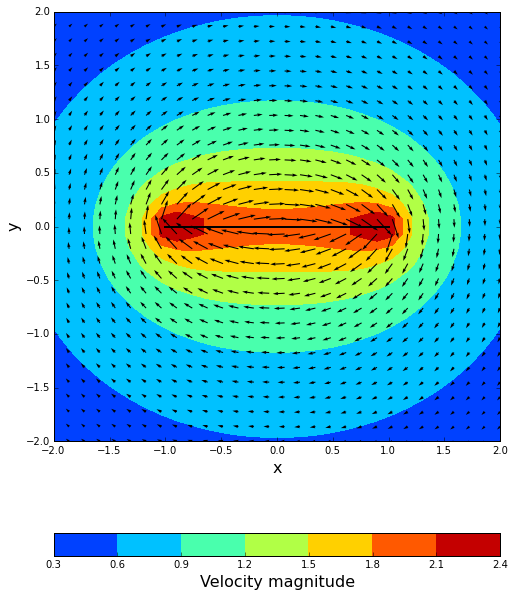

In [5]:
# compute the velocity
gamma = -4               # sheet strength
S = 1                    # sheet extents
u = get_u(x,y,S,gamma)
v = get_v(x,y,S,gamma)

# plot it
plot_uv(u,v)
pyplot.plot([-min(S,2),min(S,2)],[0,0],'k-',lw=2) # draw the vortex sheet

##### Quiz 1

What shape do the streamlines make when you are sufficiently far from the body?

1. Ellipses
2. Circles
3. Straight lines 

(Hint: This is an *interactive* notebook - which parameter can you vary to answer the question?)

##### Quiz 2

What is the u,v velocity of points very near the center of the vortex sheet?

1. $u=0,\ v=\sqrt\gamma$
2. $u=\pm\frac 12 \gamma,\ v=0$
3. $u=\pm\gamma^2,\ v=0$

(Hint: $tan^{-1}(\pm \infty) = \pm \frac \pi 2$ )

## Background flow

Next, lets add a uniform background flow with magnitude one at angle $\alpha$.

$$ U_\infty = \cos\alpha,\quad V_\infty = \sin\alpha $$

Using *superposition* the total velocity is just the sum of the vortex sheet and uniform flow.

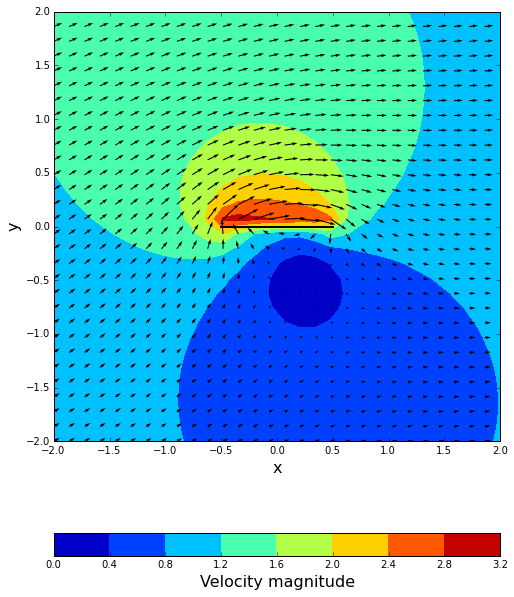

In [6]:
alpha = numpy.pi/10      # free-stream angle
U_inf = numpy.cos(alpha) # free-stream in x
V_inf = numpy.sin(alpha) # free-stream in y

# superimpose to get velocity
gamma = -4               # sheet strength
S = 0.5                  # sheet extents
u = U_inf+get_u(x,y,S,gamma)
v = V_inf+get_v(x,y,S,gamma)

# plot it 
plot_uv(u,v)
pyplot.plot([-min(S,2),min(S,2)],[0,0],'k-',lw=2) # draw the vortex sheet

The dark blue circle is a stagnation point, ie the fluid has stopped, ie $u=v=0$.

##### Quiz 3

How can you make the stagnation point touch the vortex sheet?

1. Set $\alpha=0$
2. Set $\gamma=\pm 2 U_\infty$
3. Set $S = \infty$

##### Quiz 4

Change the background flow to be vertical, ie $\alpha=\frac\pi 2$. How can you make the stagnation point touch the vortex sheet now?

1. Set $\gamma=\pm 2 U_\infty$
2. Set $\gamma=\pm 2 V_\infty$
2. Impossible

## General vortex panel

Finally, we would like to be able to compute the flow induced by a flat vortex sheet defined between any two points $x_0,y_0$ and $x_1,y_1$. A sheet so defined is called a *vortex panel*.  We could start from scratch, re-deriving the potential and velocity fields. But why would we want to do that?

##### Coding fundamental: Reuse
##### Recast problems to reuse existing code!

By switching from the global coordinates to a *panel-based* coordinate system, we can transform any vortex panel to match our previous example. After computing the velocity using our old functions, we just need to rotate the vector back to the global coordinates.

---
![image](resources/graphics0.png)

---

## class Panel

The `velocity` function below follows this process to compute the velocity induced by the panel at any point $x,y$. 

We've defined a `class` called `Panel` to hold the `velocity`, `transform_xy` and `rotate_uv` functions since these all belong together. This also lets us store the information about a `Panel` (the end points, strength, width, and direction) using the `__init__` function, and draw the `Panel` using the `plot` function. If you're interested, read up on [classes in Python](http://en.wikibooks.org/wiki/A_Beginner%27s_Python_Tutorial/Classes). 

In [7]:
# vortex panel class
class Panel:
    
    # save the inputs and pre-compute factors for the coordinate tranform
    def __init__( self, x0, y0, x1, y1, gamma ):
        self.x,self.y,self.gamma = [x0,x1],[y0,y1],gamma
        self.xc = 0.5*(x0+x1)                # panel x-center
        self.yc = 0.5*(y0+y1)                # panel y-center
        self.S = numpy.sqrt(                 # ...
            (x1-self.xc)**2+(y1-self.yc)**2) # panel width
        self.sx = (x1-self.xc)/self.S        # unit vector in x
        self.sy = (y1-self.yc)/self.S        # unit vector in y
    
    # get the velocity!
    def velocity( self, x, y ):
        gamma = self.gamma 
        xp,yp = self.transform_xy( x, y )    # transform
        up = get_u( xp, yp, self.S, gamma )  # get u prime
        vp = get_v( xp, yp, self.S, gamma )  # get v prime
        return self.rotate_uv( up, vp )      # rotate back
    
    # plot the panel
    def plot(self):
        return pyplot.plot(self.x,self.y,'k-',lw=2)
    
    # transform from global to panel coordinates
    def transform_xy( self, x, y ):
        xt = x-self.xc               # shift x
        yt = y-self.yc               # shift y
        xp = xt*self.sx+yt*self.sy   # rotate x
        yp = yt*self.sx-xt*self.sy   # rotate y
        return [ xp, yp ]
    
    # rotate velocity back to global coordinates
    def rotate_uv( self, up, vp):
        u = up*self.sx-vp*self.sy    # reverse rotate u prime
        v = vp*self.sx+up*self.sy    # reverse rotate v prime
        return [ u, v ]

Now define a general panel and compute its velocity. 

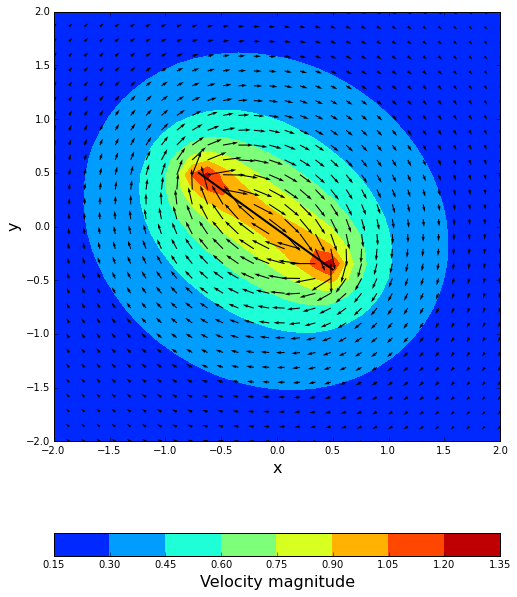

In [8]:
# define panel
my_panel = Panel(x0=-0.7,y0=0.5,x1=0.5,y1=-0.4,gamma=-2)

# compute velocity on grid
u,v = my_panel.velocity(x,y)

# plot it
plot_uv(u,v)      # plot the flow on the grid
my_panel.plot()   # plot the panel

##### Quiz 5

How can we compute the flow for a pair of parallel vortex panels with opposite strengths in a free stream?

1. Spend a couple hours writing more code
2. Superposition

##### Your turn

Write the code to make this happen. And answer the following:

 - What strength is required to stop the flow between the panels?
 - What do the streamlines look like in this case?  
 - What could this region of stopped fluid represent?

In [9]:
# your code here

---
Ignore the line below - it just loads the style sheet.

In [10]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()